In [31]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

from tqdm import tqdm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [26]:
def run_experiment(controls, n=50000):
  # np.random.seed(45)
  N_SAMPLES = n

  # Generate X
  age = np.random.randint(18, 65, N_SAMPLES)
  re74 = np.random.randint(20000, 60000, N_SAMPLES)
  hisp = np.random.choice(a=[0,1], size=N_SAMPLES)
  black = np.random.choice(a=[0,1], size=N_SAMPLES)

  re75 = re74 + np.random.randn(N_SAMPLES)
  married = ((1 / (1 + np.exp(- (3 - (age*0.05) - (re75*0.00002) + np.random.randn(N_SAMPLES)))))>0.5).astype(int)
  educ = -hisp + np.random.randint(7, 14, N_SAMPLES)
  nodegr = ((1 / (1 + np.exp(- (1 - (age*0.05) - (educ*0.02) + np.random.randn(N_SAMPLES)))))>0.5).astype(int)
  treat = ((1/(1+np.exp(nodegr + np.random.randn(N_SAMPLES))))>0.5).astype(int)

  # Compute Y
  re78 = age - 5*nodegr + 8*treat + educ - 4*black + np.random.randn(N_SAMPLES)

  data = pd.DataFrame({
  "treat": treat,
  "age" : age,
  "re74" :re74,
  "hisp" : hisp,
  "black": black,
  "re75": re75,
  "married": married,
  "educ": educ,
  "nodegr": nodegr
  })

  # Statsmodel models require us to add constant
  vars = controls#["treat", "nodegr"]#, "age","educ", "black"]
  X = data[vars]
  X = sm.add_constant(X)

  # Instantiate the model and fit it
  model = sm.OLS(re78, X)
  fitted_model = model.fit()

  # Print results summary
  # print(fitted_model.summary())
  return fitted_model.params['treat']

In [48]:
var_sets = {
    'full': ["treat", "nodegr", "age","educ", "black"],
     'minimal': ["treat", "nodegr"]
}

results = []

for i in tqdm(range(500)):
  for k, v in var_sets.items():
    result = run_experiment(controls=v, n=10000)
    results.append((k, result))

100%|██████████| 500/500 [00:17<00:00, 28.59it/s]


In [49]:
df = pd.DataFrame(results)

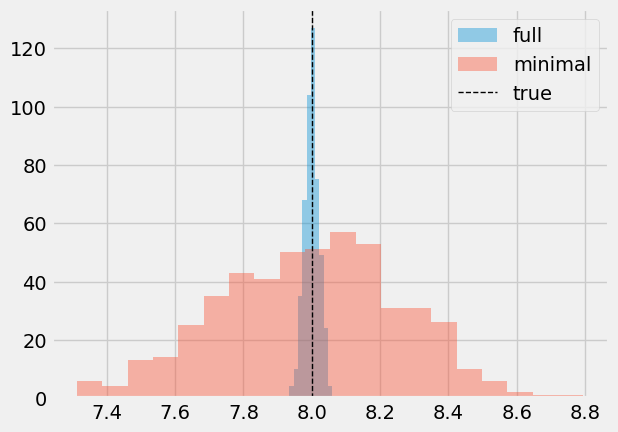

In [57]:
plt.hist(df[df[0]=='full'][1], alpha=.4, label='full', bins=10)
plt.hist(df[df[0]=='minimal'][1], alpha=.4, label='minimal', bins=20)
plt.axvline(8, ls='--', color='black', lw=1, label='true')
plt.legend()